In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

# (1)Data Cleaning (Data Preprocessing)

In [2]:
# detect the face and eyes and crop that image and store it in some different folder

In [3]:
img = cv2.imread('C:/Users/SAGAR TANWAR/Documents/Projects/Celebrity Image Classification/dataset/virat_kohli/0eb2230fbf.jpg')

In [4]:
img.shape

(605, 806, 3)

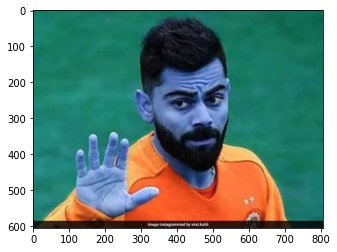

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(605, 806)

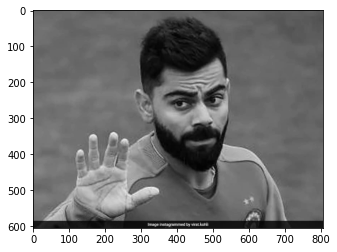

In [7]:
plt.imshow(gray, cmap='gray')

## (2)How to detect face and eyes of any image so that we can crop those images

In [8]:
face_cascade = cv2.CascadeClassifier('C:/Users/SAGAR TANWAR/Documents/Projects/Celebrity Image Classification/opencv/haarcascades/haarcascade_frontalface_default.xml')

In [9]:
eye_cascade = cv2.CascadeClassifier('C:/Users/SAGAR TANWAR/Documents/Projects/Celebrity Image Classification/opencv/haarcascades/haarcascade_eye.xml')

In [10]:
faces = face_cascade.detectMultiScale(gray)
faces

array([[325, 147, 279, 279]], dtype=int32)

In [11]:
x, y, w, h = faces[0]     # (x, y)->starting point,    w->width,    h->heigth    , (x, y) is the left top point
x, y, w, h

(325, 147, 279, 279)

In [12]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h),(255, 0, 0), 2)   # 4th param -> color of rectangle,  5th param -> size of rectangle border line
face_img.shape

(605, 806, 3)

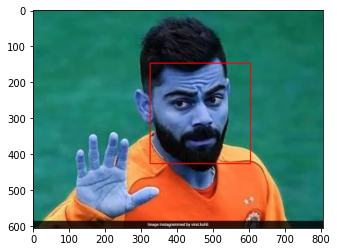

In [13]:
plt.imshow(face_img)

In [14]:
cv2.destroyAllWindows()

In [15]:
faces

array([[325, 147, 279, 279]], dtype=int32)

[[ 51  81  62  62]
 [144  70  62  62]]


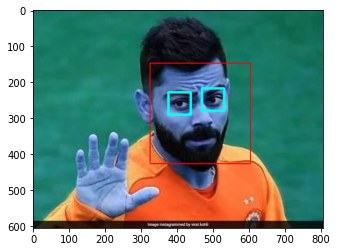

In [16]:
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    #plt.imshow(face_img)
    #plt.show()
    
    roi_gray = gray[y:y+h, x:x+w]              # roi -> row image
    #plt.imshow(roi_gray)                
    #plt.show()
    
    roi_color = face_img[y:y+h, x:x+w]
    #plt.imshow(roi_color)
    #plt.show()
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    print(eyes)
    
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 255), 5)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

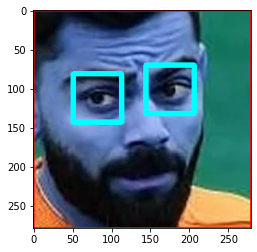

In [17]:
cropped_img = np.array(roi_color)
plt.imshow(cropped_img)

# (3)Preprocessing: Use wavelet transform as a feature for training our model
## In wavelet transformed image, we can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc
## We can extarct facial features like face, eyes, nose etc by wavelet transform

In [18]:
import pywt

### convert raw image into wavelet transformed image

In [19]:
def w2d(img, mode='haar', level=1):
    
    imArray = img
    
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)   # Datatype conversions
                                                         # convert to grayscale
     
    imArray =  np.float32(imArray)                       # convert to float
    imArray /= 255;
    
    coeffs = pywt.wavedec2(imArray, mode, level=level)   # compute coefficients 
                                                         # It decomposes a function into a set of wavelets
                                                         # It compute the wavelet coefficient of imArray

    coeffs_H = list(coeffs)                              # Process Coefficients
    coeffs_H[0] *= 0;  

    imArray_H = pywt.waverec2(coeffs_H, mode);           # reconstruction
                                                         # reconstruct the signal (image)
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

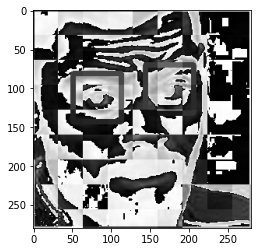

In [20]:
im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap='gray')

### Load image, detect face. If eyes >=2, then save and crop the face region
### This function take input image and returns cropped image (if face and eyes >=2 are detected)

In [21]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

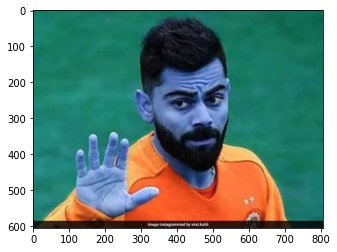

In [22]:
original_image = cv2.imread('dataset/virat_kohli/0eb2230fbf.jpg')
plt.imshow(original_image)

(274, 274, 3)


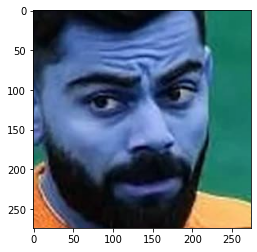

In [23]:
cropped_image = get_cropped_image_if_2_eyes('dataset/virat_kohli/0eb2230fbf.jpg')
print(cropped_image.shape)
plt.imshow(cropped_image)

In [24]:
obstructed_image = get_cropped_image_if_2_eyes('CSI/1.jpg')   # because image (eyes) is not clear and doesn't have two eyes clearly visible
type(obstructed_image)                                        # that means we should ignore this image and we will not use such image for model training

NoneType

In [25]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [26]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [27]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

### create cropped images folder for all images in dataset folder and there will be cropped folder inside dataset folder after run this code

In [28]:
import shutil
if os.path.exists(path_to_cr_data):
    #os.rmdir(path_to_cr_data)      # remove the directory or folder if it is empty otherwise eroor occured
    shutil.rmtree(path_to_cr_data)  # remove the folder that exists in path_to_cr_data
os.mkdir(path_to_cr_data)           # make directory, create the folder in the path_to_cr_data path

In [29]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

In [30]:
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [31]:
celebrity_file_names_dict

{'cropped': [],
 'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_m

### Now we manually examine cropped folder and delete any unwanted images

In [32]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\

In [33]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare x and y now

In [34]:
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [35]:
# https://github.com/rnikhori/Sports-image-classifier/blob/master/model/sports_celebrity_classification.ipynb

In [36]:
len(x[0])

4096

In [37]:
32*32*3 + 32*32

4096

In [38]:
x[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [39]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(186, 4096)

# Data cleaning process is done. Now we are ready to train our model
### Now, we will use SVM with rbf kernel tuned with heuristic finetuning



In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.7872340425531915

In [42]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.71      0.71      0.71         7
           2       0.67      0.67      0.67         6
           3       1.00      0.70      0.82        10
           4       0.81      0.93      0.87        14

    accuracy                           0.79        47
   macro avg       0.78      0.76      0.77        47
weighted avg       0.80      0.79      0.79        47



# Use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [43]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [44]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [45]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.755291,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.625661,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.776984,{'logisticregression__C': 1}


In [46]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [47]:
best_estimators['svm'].score(x_test,y_test)

0.7872340425531915

In [48]:
best_estimators['random_forest'].score(x_test,y_test)

0.6808510638297872

In [49]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.7872340425531915

In [50]:
best_clf = best_estimators['svm']

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 8,  0,  0,  0,  2],
       [ 1,  5,  1,  0,  0],
       [ 1,  1,  4,  0,  0],
       [ 1,  0,  1,  7,  1],
       [ 0,  1,  0,  0, 13]], dtype=int64)

Text(69.0, 0.5, 'Truth')

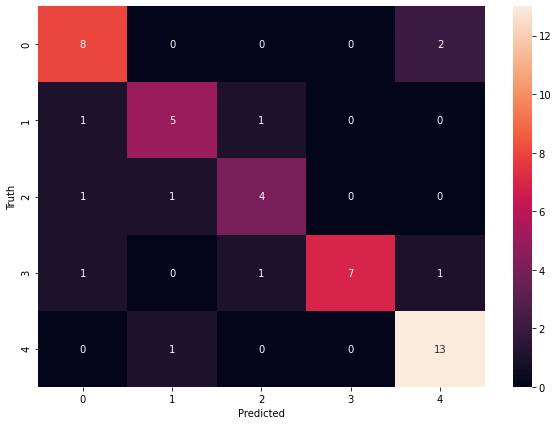

In [52]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

## Save the trained model

In [54]:
import joblib 
joblib.dump(best_clf, 'saved_model.pkl')       # Save the model as a pickle in a file 

['saved_model.pkl']

## Save class dictionary

In [55]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))